##Entendiendo los datos



Buscamos ampliar nuestro conocimeinto del prblemo revisando los datos con los que contamos


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/medmal_pos.csv")


In [4]:
df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558


### Descripción del Conjunto de Datos

Este conjunto de datos contiene reclamaciones históricas sobre seguros de compensación laboral durante varios años. Desde la base de datos de la empresa, tuvimos acceso a las siguientes variables:

- **GRCODE:** Código de la empresa según la NAIC (Asociación Nacional de Comisionados de Seguros), que es un identificador único para cada compañía o grupo de seguros.
- **GRNAME:** Nombre de la empresa según la NAIC, el nombre de la compañía o grupo de seguros correspondiente al código NAIC.
- **AccidentYear:** El año en el que ocurrieron accidentes o reclamaciones, que va desde 1988 hasta 1997.
- **DevelopmentYear:** El año en el que se desarrolla o informa la reclamación, y puede ir desde 10 años después del año del accidente.
- **DevelopmentLag:** El rezago de desarrollo, que parece calcularse como (AY-1987 + DY-1987 - 1). Probablemente representa el período de tiempo entre cuando ocurrió el accidente y cuando se informaron o resolvieron las pérdidas.
- **IncurLoss:** Pérdidas incurridas y gastos asignados informados al final del año especificado. Esta columna probablemente contiene datos financieros relacionados con los costos incurridos por el asegurador debido a reclamaciones y gastos.
- **CumPaidLoss_:** Pérdidas acumulativas pagadas y gastos asignados al final del año especificado. Esto representa la cantidad total de dinero pagado por el asegurador por reclamaciones y gastos hasta ese año.
- **BulkLoss_:** Reservas de pérdidas netas y gastos de defensa y contención de costos informadas al final del año. Esta columna podría contener datos relacionados con reservas apartadas para reclamaciones y gastos futuros.
- **PostedReserve97_:** Reservas publicadas en el año 1997 tomadas de la Exhibición de Suscripción e Inversión - Parte 2A, incluyendo pérdidas no pagadas netas y gastos no pagados de ajuste de pérdidas. Esto probablemente representa una cantidad de reserva específica para el año 1997.
- **EarnedPremDIR_:** Primas devengadas en el año de incurrimiento - directas y asumidas. Esta columna podría contener datos relacionados con las primas ganadas por el asegurador para pólizas emitidas en el año especificado.
- **EarnedPremCeded_:** Primas devengadas en el año de incurrimiento - cedidas. Esto podría representar primas devengadas pero luego cedidas a compañías de reaseguro.
- **EarnedPremNet_:** Primas devengadas en el año de incurrimiento - netas. Esta columna probablemente representa las primas netas devengadas después de tener en cuenta tanto las primas directas como las cedidas.
- **Single:** Un indicador binario donde 1 indica una entidad aseguradora única y 0 indica una aseguradora de grupo. Esta columna podría usarse para clasificar a las compañías de seguros como entidades independientes o parte de un grupo.


### Analisis exploratorio de datos

Revisamos cuantas compañias tenemos asociadas a este tipo de seguro

In [14]:
unique_companies = df['GRNAME'].nunique()

print("Number of unique companies:", unique_companies)

Number of unique companies: 34


Luego revisamos la calidad de los datos, para esto se revisan valores nulos, cuantos valores unicos tiene cada columna

In [22]:
df.isnull().sum()

GRCODE                0
GRNAME                0
AccidentYear          0
DevelopmentYear       0
DevelopmentLag        0
IncurLoss_F2          0
CumPaidLoss_F2        0
BulkLoss_F2           0
EarnedPremDIR_F2      0
EarnedPremCeded_F2    0
EarnedPremNet_F2      0
Single                0
PostedReserve97_F2    0
dtype: int64

Se realiza un analisis de los valores maximos y minimos qu epueden tomar nuestras variables numericas, lo que nos muestra variables que tienen valores negativos como minimos

In [13]:
df[['CumPaidLoss_F2','IncurLoss_F2','BulkLoss_F2','EarnedPremDIR_F2','EarnedPremCeded_F2','EarnedPremNet_F2']].describe()

,CumPaidLoss_F2,IncurLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,6706.067059,11609.344412,1095.803235,14111.605882,1803.497059,12308.108824
std,17121.815066,26802.819463,7612.672277,26399.284476,3893.424584,24824.225795
min,-1190.000000,-17.000000,-32101.000000,-781.000000,-6214.000000,-728.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187.000000,645.000000,0.000000,1500.000000,106.500000,1302.000000
75%,4385.500000,9050.500000,107.250000,18094.500000,1473.500000,13490.000000
max,113189.000000,179425.000000,104402.000000,131948.000000,25553.000000,135318.000000


## Revision columna categorica

<Axes: xlabel='Single', ylabel='count'>

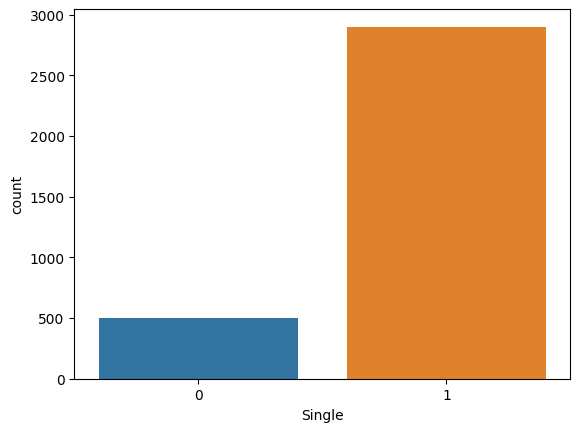

In [34]:
sns.countplot(data=df, x='Single')


Revisando la distribución de la varibale categorica single encontramos que existen mas compañias de tipo 1, es decir entidad aseguradora individual y no un agrupado de aseguradoras

Realizamos un analisis por año de las perdidas obtenidas por las diferentes aseguradoras, se encuentra que las perdidas incurridas son mayores a las acumuladas pues se puede tardar en reportar la afectacion

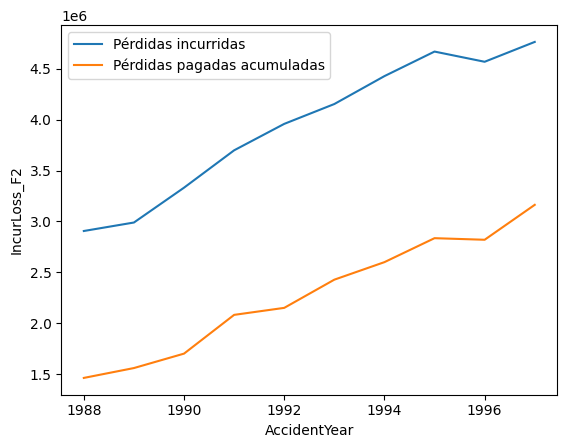

In [35]:
grouped_year_data = df.groupby('AccidentYear')[['IncurLoss_F2', 'CumPaidLoss_F2']].sum().reset_index()

sns.lineplot(data=grouped_year_data, x='AccidentYear', y='IncurLoss_F2', label='Pérdidas incurridas')
sns.lineplot(data=grouped_year_data, x='AccidentYear', y='CumPaidLoss_F2', label='Pérdidas pagadas acumuladas')
plt.legend()
plt.show()

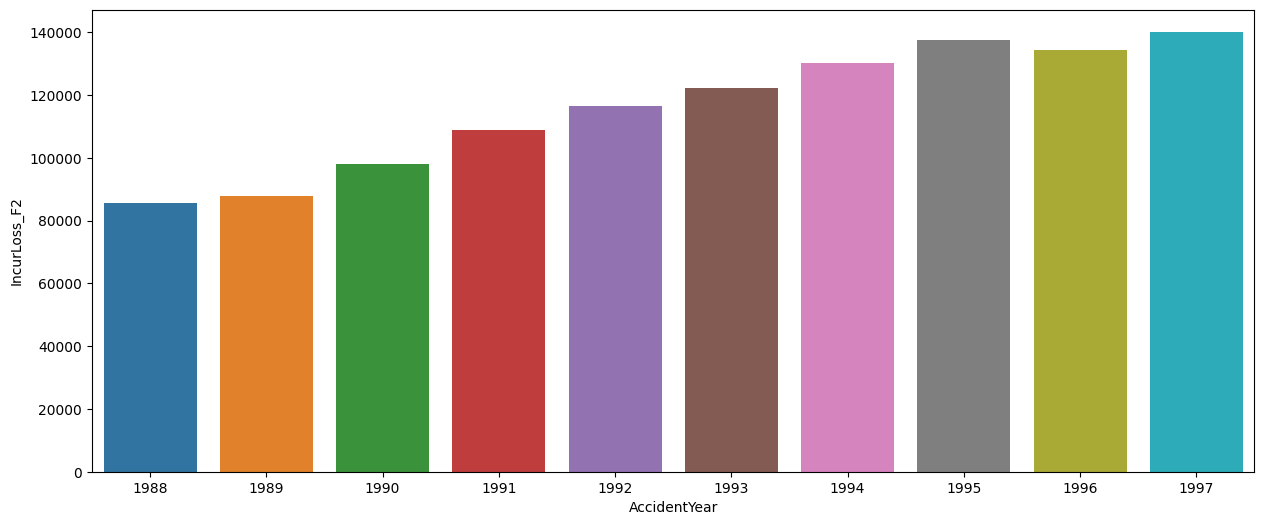

In [38]:
g_data = df.groupby(['GRNAME','AccidentYear'])[['IncurLoss_F2']].sum().reset_index()
fig, ax = plt.subplots(figsize=(15,6))
barplot = sns.barplot(x='AccidentYear', y='IncurLoss_F2', data=g_data, errorbar=None)


Visualizamos graficamente las reservas que se han hecho por año en todas las compañias

## Calculo de los triangulos

Tomamos la informacion que tenemos y lo juntamos en un dataframe en el que se encuentra ya separado el año de accidente y el tiempo de desarrollo, obteniendo un dataframe de 340 filas y 12 columnas

In [43]:
result_df=pd.DataFrame(columns=['Año','Code','1','2','3','4','5','6','7','8','9','10'])
for code in df['GRCODE'].unique():
  unique = df[df["GRCODE"]==code]
  for year in unique['AccidentYear'].unique():
    maybe = unique[unique['AccidentYear']==year][['AccidentYear','DevelopmentLag','IncurLoss_F2']].transpose().iloc[-1].tolist()
    maybe.insert(0, year)
    maybe.insert(1,code)
    result_df.loc[len(result_df)] = maybe


result_df

,Año,Code,1,2,3,4,5,6,7,8,9,10
0,1988,669,121905,112211,103226,99599,96006,90487,82640,80406,78920,78511
1,1989,669,122679,113165,110037,101142,90817,81919,77491,73577,72716,72317
2,1990,669,118157,117497,116377,99895,89252,81916,79134,76333,75612,75350
3,1991,669,117981,122443,121056,113795,102830,98071,94870,91062,90493,90345
4,1992,669,131059,130155,124195,113974,106817,99182,92588,91000,89256,89251
...,...,...,...,...,...,...,...,...,...,...,...,...
335,1993,44504,3310,3240,3385,3257,2604,1929,1808,1933,2310,1808
336,1994,44504,5373,5178,5177,4930,4544,4491,4261,4539,4537,4537
337,1995,44504,3796,3869,3977,4091,2512,2346,2220,2265,2234,2226
338,1996,44504,3383,4024,3540,3398,2777,2720,3064,3063,3063,3063


Vemos como seria el cuadro completo para cada compañia

In [9]:
dicto = {k: v for k, v in result_df.groupby("Code")}

dicto[669]

,Año,Code,1,2,3,4,5,6,7,8,9,10
0,1988,669,2716,24576,43990,59722,71019,76354,76792,77207,77588,77656
1,1989,669,3835,25158,45145,60331,67457,70821,71769,72085,72035,72171
2,1990,669,4838,27965,50873,66400,71875,74755,75176,75250,75250,75250
3,1991,669,4456,34241,64737,79390,84465,87375,89119,89825,90333,90343
4,1992,669,5970,36080,68268,81783,86076,87167,88282,88857,89087,89102
5,1993,669,9398,46210,77045,86298,91796,93827,95871,95943,95987,96008
6,1994,669,6181,39204,70006,82385,86523,88387,90408,90525,91640,91796
7,1995,669,7828,42356,70729,79340,81142,81891,81905,81897,81781,81782
8,1996,669,8854,51400,81653,90504,94284,96456,97305,97175,97212,97225
9,1997,669,7818,47098,84142,93724,97401,97726,98250,98355,98627,98655


Con los nuevos elementos a desarrollar con cada compañia con su propio dataframe, realizamos un analisi basico con su media y varianza

In [10]:
s = (10,10)
suma_total = np.zeros(s)

for key in dicto.keys():
    suma_total += dicto[key][['1','2','3','4','5','6','7','8','9','10']].to_numpy()
n = len(dicto.keys())  # Número de matrices
media = suma_total / n

pd.DataFrame(media)

,0,1,2,3,4,5,6,7,8,9
0,174.529412,1389.941176,2795.705882,3871.058824,4856.382353,5351.088235,5835.147059,6060.823529,6275.705882,6389.382353
1,277.441176,1525.147059,2911.058824,4387.323529,5164.352941,5811.470588,6213.000000,6411.352941,6550.205882,6601.617647
2,352.823529,1610.058824,3498.941176,4814.558824,5599.735294,6293.294118,6623.500000,6932.852941,7107.794118,7191.294118
3,279.911765,2159.411765,4304.323529,5860.647059,7205.500000,7656.852941,8115.382353,8400.852941,8587.617647,8657.588235
4,367.029412,2300.352941,4629.411765,6175.264706,7177.000000,7853.147059,8338.676471,8582.264706,8846.264706,8981.617647
5,536.147059,2667.941176,4891.911765,6702.676471,8124.558824,9014.558824,9433.500000,9838.294118,10004.735294,10189.029412
6,439.764706,2773.617647,5487.558824,7424.970588,8740.205882,9593.529412,10091.911765,10366.088235,10696.264706,10856.529412
7,529.264706,3240.617647,6153.588235,8081.529412,9474.029412,10462.029412,10881.382353,11285.911765,11541.882353,11747.823529
8,599.705882,3161.000000,5974.617647,7903.558824,9479.676471,10445.735294,10992.323529,11282.529412,11492.970588,11607.058824
9,598.852941,3312.823529,6747.470588,9183.823529,10668.735294,11645.735294,12198.764706,12670.235294,12859.647059,13152.882353


In [11]:
s = (10,10)
var = np.zeros(s)

lista_de_valores = list(dicto.values())
diferencias = [A_i[['1','2','3','4','5','6','7','8','9','10']].to_numpy() - media for A_i in lista_de_valores]
varianza = np.mean([(dif) ** 2 for dif in diferencias], axis=0)
pd.DataFrame(varianza)

,0,1,2,3,4,5,6,7,8,9
0,2.273031e+05,1.790895e+07,6.061233e+07,1.160197e+08,1.726454e+08,2.084018e+08,2.353480e+08,2.504105e+08,2.638362e+08,2.729619e+08
1,4.383927e+05,1.852291e+07,6.344923e+07,1.283856e+08,1.714953e+08,2.057030e+08,2.317054e+08,2.461256e+08,2.589485e+08,2.632181e+08
2,7.228364e+05,2.330727e+07,8.172295e+07,1.508689e+08,1.931618e+08,2.399297e+08,2.684577e+08,3.011027e+08,3.148459e+08,3.251461e+08
3,7.034726e+05,3.649282e+07,1.336095e+08,2.249394e+08,3.077416e+08,3.527114e+08,4.022058e+08,4.299156e+08,4.555556e+08,4.642298e+08
4,1.052496e+06,3.982299e+07,1.461544e+08,2.279984e+08,2.848081e+08,3.298165e+08,3.782228e+08,4.136172e+08,4.328807e+08,4.525735e+08
5,2.584343e+06,6.207179e+07,1.789089e+08,2.522893e+08,3.341621e+08,4.073773e+08,4.466308e+08,4.867125e+08,5.093235e+08,5.340272e+08
6,1.202323e+06,4.739415e+07,1.630794e+08,2.585882e+08,3.369674e+08,4.117840e+08,4.655836e+08,4.889859e+08,5.306106e+08,5.524483e+08
7,1.894086e+06,5.840711e+07,1.777285e+08,2.635713e+08,3.507284e+08,4.315377e+08,4.727627e+08,5.245960e+08,5.538317e+08,5.853187e+08
8,2.460078e+06,7.839887e+07,2.113661e+08,2.997256e+08,3.896281e+08,4.635536e+08,5.159488e+08,5.428836e+08,5.687242e+08,5.797520e+08
9,2.142874e+06,6.654830e+07,2.290889e+08,3.399178e+08,4.235169e+08,4.926270e+08,5.397082e+08,5.854137e+08,6.046627e+08,6.473885e+08


## Modelos

El primer modelo a probar es un modelo deterministico que es el que esta implementado en la empresa actualmente, es un modelo solido

In [49]:
# Función para calcular los factores de desarrollo
def get_factors(upper_triangle):
    factor_triangle = upper_triangle.copy()
    for col in factor_triangle.columns[:-1]:
        next_col = factor_triangle.columns[factor_triangle.columns.get_loc(col) + 1]
        factor_triangle[next_col] = upper_triangle[next_col] / upper_triangle[col]
    return factor_triangle.fillna(0)

# Diccionario para almacenar los triángulos de cada aseguradora
triangles_dict = {}

# Itera sobre cada aseguradora única
for grcode in df['GRCODE'].unique():
    df_filtered = df[df['GRCODE'] == grcode]

    # Cálculo del dev_triangle (tu código existente)
    g_data_triang = df_filtered.groupby(['AccidentYear', 'DevelopmentLag'])['IncurLoss_F2'].sum().reset_index()
    dev_triangle = pd.DataFrame()

    for year in g_data_triang['AccidentYear'].unique():
        temp_df = g_data_triang[g_data_triang['AccidentYear'] == year].copy()
        temp_df['IncurLoss_F2_Acumulado'] = temp_df['IncurLoss_F2'].cumsum()
        dev_triangle = pd.concat([dev_triangle, temp_df], ignore_index=True)

    dev_triangle = dev_triangle.pivot(index='AccidentYear', columns='DevelopmentLag', values='IncurLoss_F2_Acumulado')
    dev_triangle.fillna(0, inplace=True)

    # Crear DataFrames vacíos para los triángulos superior e inferior
    upper_triangle = pd.DataFrame(index=dev_triangle.index, columns=dev_triangle.columns).fillna(0)
    lower_triangle = pd.DataFrame(index=dev_triangle.index, columns=dev_triangle.columns).fillna(0)

    # Llenar los triángulos superior e inferior
    max_lag = len(dev_triangle.columns)
    for i, row_index in enumerate(dev_triangle.index):
        known_lags = max_lag - i
        for j, col_index in enumerate(dev_triangle.columns):
            if j < known_lags:
                upper_triangle.at[row_index, col_index] = dev_triangle.at[row_index, col_index]
            else:
                lower_triangle.at[row_index, col_index] = dev_triangle.at[row_index, col_index]

    # Calcular los factores de desarrollo
    factor_triangle = get_factors(upper_triangle)

    # Guardar todo en el diccionario
    triangles_dict[grcode] = {
        'dev_triangle': dev_triangle,
        'upper_triangle': upper_triangle,
        'lower_triangle': lower_triangle,
        'factor_triangle': factor_triangle
    }

In [57]:
import numpy as np

# Triángulo real (dev_triangle) y proyectado (upper_triangle * factor_triangle)
real_triangle = triangles_dict[grcode]['dev_triangle'].values
projected_triangle = triangles_dict[grcode]['upper_triangle'].values * triangles_dict[grcode]['factor_triangle'].values

# Calcular el MSE y MAE
mse = np.mean((real_triangle - projected_triangle) ** 2)
mae = np.mean(np.abs(real_triangle - projected_triangle))

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 17974140337936.023
MAE: 1067834.1276999724


In [84]:

import pandas as pd

# Number of rows and columns
n = 10

# Create an empty dataframe with the desired columns
columns = ['intercept'] + [f'alpha_{i}' for i in range(2, n+1)] + [f'beta_{i}' for i in range(2, n+1)]
design_matrix = pd.DataFrame(0, index=[f'y_{i}{j-i+1}' for i in range(1, n+1) for j in range(i, n+1)], columns=columns)

# Populate the dataframe
for row in design_matrix.index:
    i, j = int(row[2]), int(row[3:])
    design_matrix.at[row, 'intercept'] = 1
    if i > 1:
        design_matrix.at[row, f'alpha_{i}'] = 1
    if j > 1 and j != i:  # Add a condition to check if j is not equal to i
        design_matrix.at[row, f'beta_{j}'] = 1


In [85]:
df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558


In [90]:
from sklearn.linear_model import LinearRegression

# Aplanar el triángulo superior y preparar las características (X) y etiquetas (y)
X = []
y = []
for grcode, triangles in triangles_dict.items():
    upper_triangle = triangles['upper_triangle']
    lower_triangle = triangles['lower_triangle']
    for i, row in upper_triangle.iterrows():
        for j, value in row.iteritems():
            if np.isnan(value):
                continue
            features = [i, j]  # AccidentYear y DevelopmentLag
            label = lower_triangle.at[i, j]
            X.append(features)
            y.append(label)

<ipython-input-90-39817499dd5a>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, value in row.iteritems():


In [91]:
X = np.array(X)
y = np.array(y)

In [92]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Hacer predicciones con el modelo entrenado
predicted_values = model.predict(X)

# Calcular el MSE y MAE
mse_regression = mean_squared_error(y, predicted_values)
mae_regression = mean_absolute_error(y, predicted_values)

print(f'MSE (Regresión): {mse_regression}')
print(f'MAE (Regresión): {mae_regression}')


MSE (Regresión): 22243825556.51614
MAE (Regresión): 66636.2637703422


In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Asegurarse de que X y y sean arrays de NumPy
X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluar el modelo en el conjunto de prueba
mse_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
mae_nn = tf.keras.metrics.MeanAbsoluteError()(y_test, model.predict(X_test_scaled))

print(f'MSE (Red Neuronal): {mse_nn}')
print(f'MAE (Red Neuronal): {mae_nn.numpy()}')

Epoch 1/50
85/85 - 1s - loss: 25810227200.0000 - val_loss: 26976342016.0000 - 1s/epoch - 17ms/step
Epoch 2/50
85/85 - 0s - loss: 25810178048.0000 - val_loss: 26976286720.0000 - 305ms/epoch - 4ms/step
Epoch 3/50
85/85 - 0s - loss: 25810120704.0000 - val_loss: 26976225280.0000 - 345ms/epoch - 4ms/step
Epoch 4/50
85/85 - 0s - loss: 25810051072.0000 - val_loss: 26976147456.0000 - 347ms/epoch - 4ms/step
Epoch 5/50
85/85 - 1s - loss: 25809958912.0000 - val_loss: 26976045056.0000 - 505ms/epoch - 6ms/step
Epoch 6/50
85/85 - 0s - loss: 25809846272.0000 - val_loss: 26975909888.0000 - 485ms/epoch - 6ms/step
Epoch 7/50
85/85 - 0s - loss: 25809690624.0000 - val_loss: 26975739904.0000 - 208ms/epoch - 2ms/step
Epoch 8/50
85/85 - 0s - loss: 25809516544.0000 - val_loss: 26975543296.0000 - 191ms/epoch - 2ms/step
Epoch 9/50
85/85 - 0s - loss: 25809303552.0000 - val_loss: 26975313920.0000 - 177ms/epoch - 2ms/step
Epoch 10/50
85/85 - 0s - loss: 25809053696.0000 - val_loss: 26975037440.0000 - 206ms/epoch - 

In [96]:
print(f'MSE (Red Neuronal): {mse_nn}')
print(f'MAE (Red Neuronal): {mae_nn.numpy()}')

MSE (Red Neuronal): 26947545088.0
MAE (Red Neuronal): 44890.61328125
